# Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

## Get the data

We are using the marketing_customer_analysis.csv file.

## Dealing with the data

Already done in the round 2.

## Explore the data

Done in the round 3.

## Processing Data

(Further processing...)

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [6]:
data = pd.read_csv('/Users/ziga/Classroom-Materials-main/lab-customer-analysis-round-5/files_for_lab/csv_files/marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


**X-Y Split** If you have not done it, you have you take in count that the target will be `total_claim_amount`

In [7]:
y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'], axis=1)

**Normalize (numerical)** If you have not done it yet, you can define a function using `StandardScaler`from sklearn library

In [8]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [9]:
transformer = StandardScaler()
transformer.fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

array([[-0.76287773,  0.61282744, -0.70392465, ..., -1.54328695,
        -0.42224956, -0.82264788],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.21733419,
        -0.42224956,  2.10615996],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.36068043,
        -0.42224956, -0.40424676],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ..., -0.39651699,
         2.87324529, -0.40424676],
       [-0.06993547, -0.51735647,  0.08082028, ..., -1.61496007,
        -0.42224956,  0.01415436],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.50282075,
        -0.42224956, -0.82264788]])

In [10]:
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


<AxesSubplot:ylabel='Density'>

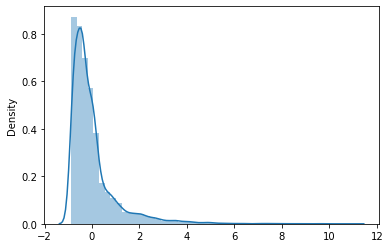

In [11]:
sns.distplot(x_standardized.T[0])

**One Hot/Label Encoding (categorical)** Try one of the two options learned in class

In [12]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [13]:
encoded = encoder.transform(X_cat).toarray()

**Concat DataFrames**

In [14]:
X = np.concatenate([x_normalized, encoded], axis=1)

NameError: name 'x_normalized' is not defined

## Linear Regression

- Train-test split.
- Apply linear regression.

**Train-test split** Divide your data in a train part and a test part

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Apply linear regression** For this question you can use `statsmodels` or `sklearn` libraries

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
predictions  = model.predict(X_test)
predictions.shape

## Model Validation

- Description:
R2.
MSE.
RMSE.
MAE.

**Get R2 from the model**

In [ ]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

**Get MSE from the model**

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(mse)

**Get RMSE from the model**

In [ ]:
rmse = math.sqrt(mse)
print(rmse)

**Get MAE from the model**

In [ ]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)